In [277]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from pandas import DataFrame
from sklearn.base import RegressorMixin
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# https://github.com/selva86/datasets
# https://vincentarelbundock.github.io/Rdatasets/datasets.html

# 1.
Загрузите данные из файла reglab1.txt. Используя функцию lm, постройте регрессию (используйте разные модели). Выберите наиболее подходящую модель, объясните свой выбор.

In [460]:
data = pd.read_csv("reglab1.txt", sep="\t")
data.head()

,z,x,y
0,2.836772,0.271010,0.308331
1,4.987167,0.589598,0.514913
2,6.412325,0.651744,0.730453
3,4.641998,0.581983,0.461400
4,2.793941,0.463688,0.191102


In [461]:
data.isna().any()

z    False
x    False
y    False
dtype: bool

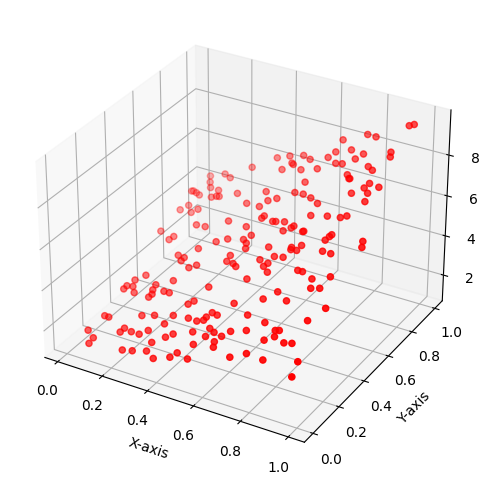

In [462]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data['x'], data['y'], data['z'], c='r', marker='o')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

In [463]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('z', axis=1), data['z'], test_size=0.2)

In [464]:
def fit_and_evaluate(model: RegressorMixin, X_train: DataFrame, y_train: DataFrame, X_test: DataFrame, y_test: DataFrame) -> tuple:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return (mean_squared_error(y_test, y_pred))**0.5, y_pred
rmses = []

In [465]:
linear_model = LinearRegression()
linear_rmse, linear_y_pred = fit_and_evaluate(linear_model, X_train, y_train, X_test, y_test)
rmses.append(linear_rmse)
print("Linear Regression RMSE:", linear_rmse)

Linear Regression RMSE: 0.313394971988406


In [466]:
ridge_model = Ridge(random_state=100)
ridge_rmse, ridge_pred = fit_and_evaluate(ridge_model, X_train, y_train, X_test, y_test)
rmses.append(ridge_rmse)
print("Ridge Regression RMSE:", ridge_rmse)

Ridge Regression RMSE: 0.32847892381152544


In [467]:
lasso_model = Lasso()
lasso_rmse, lasso_pred = fit_and_evaluate(lasso_model, X_train, y_train, X_test, y_test)
rmses.append(lasso_rmse)
print("Lasso Regression RMSE:", lasso_rmse)

Lasso Regression RMSE: 1.822100058186162


In [468]:
elastic_model = ElasticNet()
elastic_rmse, elastic_pred = fit_and_evaluate(lasso_model, X_train, y_train, X_test, y_test)
rmses.append(elastic_rmse)
print("Elastic Regression RMSE:", elastic_rmse)

Elastic Regression RMSE: 1.822100058186162


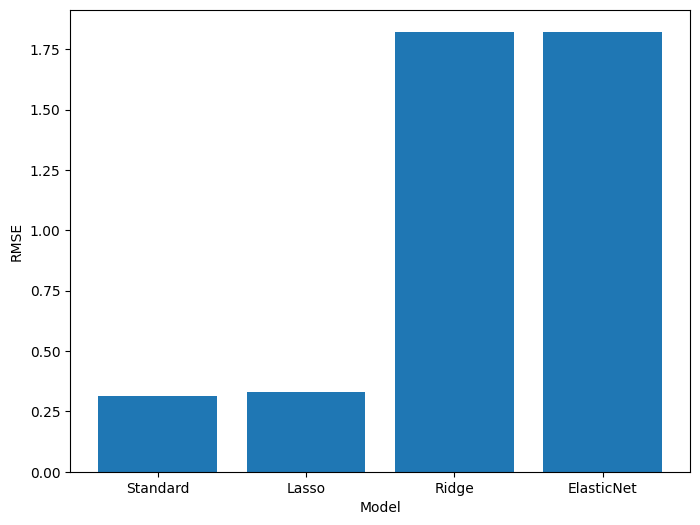

In [471]:
names= ["Standard", "Lasso", "Ridge", "ElasticNet"]
plt.figure(figsize=(8,6))
plt.bar(names, rmses)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.savefig("dif_reg_rmse.png")
plt.show()

# 2.
Реализуйте следующий алгоритм для уменьшения количества признаков, используемых для построения регрессии: для каждого k из [0, 1, ..., d] выбрать подмножество признаков мощности k^1, минимизирующее остаточную сумму квадратов RSS. Используя полученный алгоритм, выберите оптимальное подможество признаков для данных из файла reglab2.txt. Объясните свой выбор. Для генерации всех возможных сочетаний по m элементов из некоторого множества x можно использовать функцию combn(x, m, ...). 

In [72]:
data = pd.read_csv("reglab2.txt", sep="\t")
data.head()

,y,x1,x2,x3,x4
0,3.469720,0.233628,0.835549,0.102965,0.457428
1,0.768448,0.117920,0.090544,0.258778,0.283951
2,2.880374,0.091520,0.797592,0.198528,0.699287
3,3.745485,0.876722,0.062935,0.615415,0.176058
4,1.853966,0.207406,0.303490,0.775967,0.667351


In [73]:
data.isna().any()

y     False
x1    False
x2    False
x3    False
x4    False
dtype: bool

In [74]:
X = data.drop("y", axis=1)
y = data["y"]

In [75]:
def res_sum_squares(y_test, y_pred):
    return ((y_test-y_pred)**2).sum()

In [76]:
from itertools import combinations

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
best_subset = None
best_model = None
best_rss = float('inf')
subset_rss = {}
for k in range(1, len(X.columns) + 1):
    feature_combinations = combinations(X.columns, k)
    for subset in feature_combinations:
        subset_X_train = X_train[list(subset)]
        subset_X_test = X_test[list(subset)]
        model = LinearRegression()
        model.fit(subset_X_train, y_train)
        y_pred = model.predict(subset_X_test)
        rss = res_sum_squares(y_test, y_pred)
        subset_rss[tuple(subset)] = rss
        if rss < best_rss:
            best_rss = rss
            best_subset = subset
            best_model = model
print(best_rss)
print(best_subset)
print(best_model)
print(subset_rss)

0.045796882936136776
('x1', 'x2', 'x3', 'x4')
LinearRegression()
{('x1',): 23.467817500818644, ('x2',): 37.22987507114878, ('x3',): 59.08398182111348, ('x4',): 59.990458599574566, ('x1', 'x2'): 0.10908994089534794, ('x1', 'x3'): 25.678499901720926, ('x1', 'x4'): 23.492253545540287, ('x2', 'x3'): 37.12838316811199, ('x2', 'x4'): 38.28654239402637, ('x3', 'x4'): 59.76814710372179, ('x1', 'x2', 'x3'): 0.09096484854846751, ('x1', 'x2', 'x4'): 0.0733901815209814, ('x1', 'x3', 'x4'): 25.71251138858315, ('x2', 'x3', 'x4'): 38.45581801510981, ('x1', 'x2', 'x3', 'x4'): 0.045796882936136776}


In [79]:
df = pd.DataFrame(list(subset_rss.items()), columns=['Признаки', 'Значение'])

# Вывод DataFrame
df.sort_values(by='Значение')

,Признаки,Значение
14,"(x1, x2, x3, x4)",0.045797
11,"(x1, x2, x4)",0.073390
10,"(x1, x2, x3)",0.090965
4,"(x1, x2)",0.109090
0,"(x1,)",23.467818
6,"(x1, x4)",23.492254
5,"(x1, x3)",25.678500
12,"(x1, x3, x4)",25.712511
7,"(x2, x3)",37.128383
1,"(x2,)",37.229875


# 3.
Загрузите данные из файла cygage.txt. Постройте регрессию, выражающую зависимость возраста исследуемых отложений от глубины залегания, используя веса наблюдений. Оцените качество построенной модели.

In [293]:
data = pd.read_csv('cygage.txt', sep='\t')
data.head()

,calAge,Depth,Weight
0,0,0,1.0
1,3707,77,0.1
2,4150,90,0.1
3,5350,107,0.1
4,4500,168,0.1


In [302]:
X = data[['Depth']]
y = data['calAge']
weights = data['Weight']

model = LinearRegression()
model.fit(X, y, sample_weight=weights)

y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred)**0.5
mape = mean_absolute_percentage_error(y, y_pred)
print(f'Root Mean Squared Error on test data: {rmse}')
print(f'MAPE: {mape}')

Root Mean Squared Error on test data: 1113.9896692600273
MAPE: 2.944490658174897e+17


In [303]:
X = data[['Depth']]
y = data['calAge']
weights = data['Weight']

model = Lasso()
model.fit(X, y, sample_weight=weights)

y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred)**0.5
mape = mean_absolute_percentage_error(y, y_pred)
print(f'Root Mean Squared Error on test data: {rmse}')
print(f'MAPE: {mape}')

Root Mean Squared Error on test data: 1113.9884546066698
MAPE: 2.944515601783248e+17


In [304]:
X = data[['Depth']]
y = data['calAge']
weights = data['Weight']

model = Ridge()
model.fit(X, y, sample_weight=weights)

y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred)**0.5
mape = mean_absolute_percentage_error(y, y_pred)
print(f'Root Mean Squared Error on test data: {rmse}')
print(f'MAPE: {mape}')

Root Mean Squared Error on test data: 1113.9838842302017
MAPE: 2.9446094606869984e+17


In [305]:
X = data[['Depth']]
y = data['calAge']
weights = data['Weight']

model = ElasticNet()
model.fit(X, y, sample_weight=weights)

y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred)**0.5
mape = mean_absolute_percentage_error(y, y_pred)
print(f'Root Mean Squared Error on test data: {rmse}')
print(f'MAPE: {mape}')

Root Mean Squared Error on test data: 1113.9757572182095
MAPE: 2.944776373930192e+17


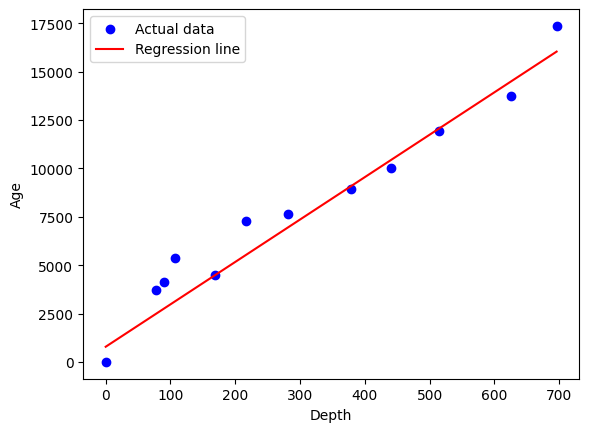

In [306]:
plt.scatter(X, y, c='blue', label='Actual data')
plt.plot(X, y_pred, c='red', label='Regression line')
plt.xlabel('Depth')
plt.ylabel('Age')
plt.legend()
plt.savefig('age_depth.png')
plt.show()

# 4.
Загрузите данные Longley (макроэкономические данные). Данные состоят из 7 экономических переменных, наблюдаемых с 1947 по 1962 годы (n=16):
GNP.deflator - дефлятор цен,
GNP - валовой национальный продукт, 
Unemployed – число безработных
Armed.Forces – число людей в армии
Population – население, возраст которого старше 14 лет
Year - год
Employed – количество занятых 
Построить регрессию lm(Employed ~ .) .
Исключите из набора данных longley переменную "Population". Разделите данные на тестовую и обучающую выборки равных размеров случайным образом. Постройте гребневую регрессию для значений  , подсчитайте ошибку на тестовой и обучающей выборке для данных значений λ, постройте графики. Объясните полученные результаты.


In [325]:
data = pd.read_csv('longley.csv')
data = data.drop("Population", axis=1)
data = data.drop('rownames', axis=1)
data

,GNP.deflator,GNP,Unemployed,Armed.Forces,Year,Employed
0,83.0,234.289,235.6,159.0,1947,60.323
1,88.5,259.426,232.5,145.6,1948,61.122
2,88.2,258.054,368.2,161.6,1949,60.171
3,89.5,284.599,335.1,165.0,1950,61.187
4,96.2,328.975,209.9,309.9,1951,63.221
5,98.1,346.999,193.2,359.4,1952,63.639
6,99.0,365.385,187.0,354.7,1953,64.989
7,100.0,363.112,357.8,335.0,1954,63.761
8,101.2,397.469,290.4,304.8,1955,66.019
9,104.6,419.180,282.2,285.7,1956,67.857


In [326]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Employed", axis=1), data["Employed"], test_size=0.5, random_state=100)

In [329]:
alphas = [10**(-3+0.2*i) for i in range(0, 26)]
train_errors = []
test_errors = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    rmse_train = (mean_squared_error(y_train, model.predict(X_train)))**0.5
    train_errors.append(rmse_train)
    rmse_test = (mean_squared_error(y_test, model.predict(X_test)))**0.5
    test_errors.append(rmse_test)


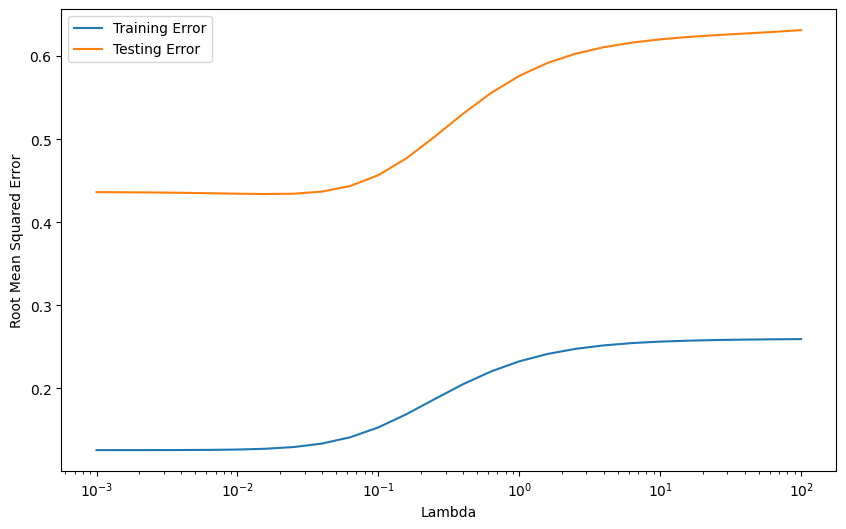

In [335]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Training Error')
plt.plot(alphas, test_errors, label='Testing Error')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Root Mean Squared Error')
#plt.title('Ridge Regression - Training vs Testing Error')
plt.legend()
plt.savefig('error_to_lambda.png')
plt.show()

# 5.
Загрузите данные EuStockMarkets из пакета « datasets». Данные содержат ежедневные котировки на момент закрытия фондовых бирж: Germany DAX (Ibis), Switzerland SMI, France CAC, и UK FTSE. Постройте на одном графике все кривые изменения котировок во времени. Постройте линейную регрессию для каждой модели в отдельности и для всех моделей вместе. Оцените, какая из бирж имеет наибольшую динамику.

In [336]:
data = pd.read_csv('EuStockMarkets.csv')
data = data.drop("rownames", axis=1)
data.head()

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7


In [337]:
data.isna().any()

DAX     False
SMI     False
CAC     False
FTSE    False
dtype: bool

RMSE: 304.30029904220356
RMSE: 422.3183225637305
RMSE: 266.62620578603975
RMSE: 216.98026268683026


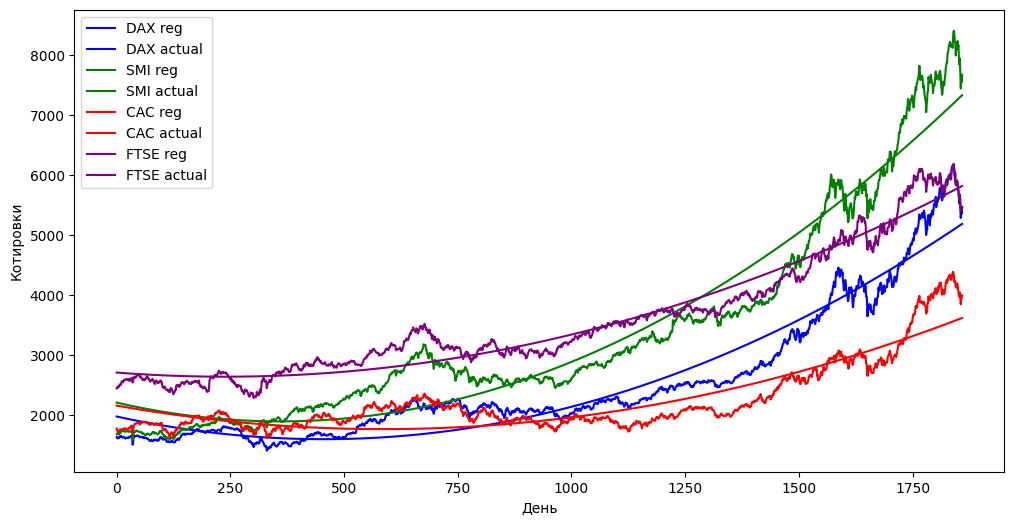

In [359]:
plt.figure(figsize=(12, 6))
colors = {'DAX': 'blue', 'SMI': 'green', 'CAC': 'red', 'FTSE': 'purple'}
for column in ['DAX', 'SMI', 'CAC', 'FTSE']:
    X = np.column_stack((data.index.values, data.index.values**2))
    #X = data.index.values.reshape(-1, 1)
    y = data[column]
    model = LinearRegression()
    model.fit(X, y)
    predicted = model.predict(X)
    plt.plot(data.index, predicted, label=column + " reg", color=colors[column])
    plt.plot(data.index, data[column], label=column + " actual", color=colors[column])
    print(f"RMSE: {mean_squared_error(predicted, data[column])**0.5}")
#plt.title('Ежедневные котировки на момент закрытия фондовых бирж')
plt.xlabel('День')
plt.ylabel('Котировки')
plt.legend()
plt.savefig('birzhi_together.png')
plt.show()

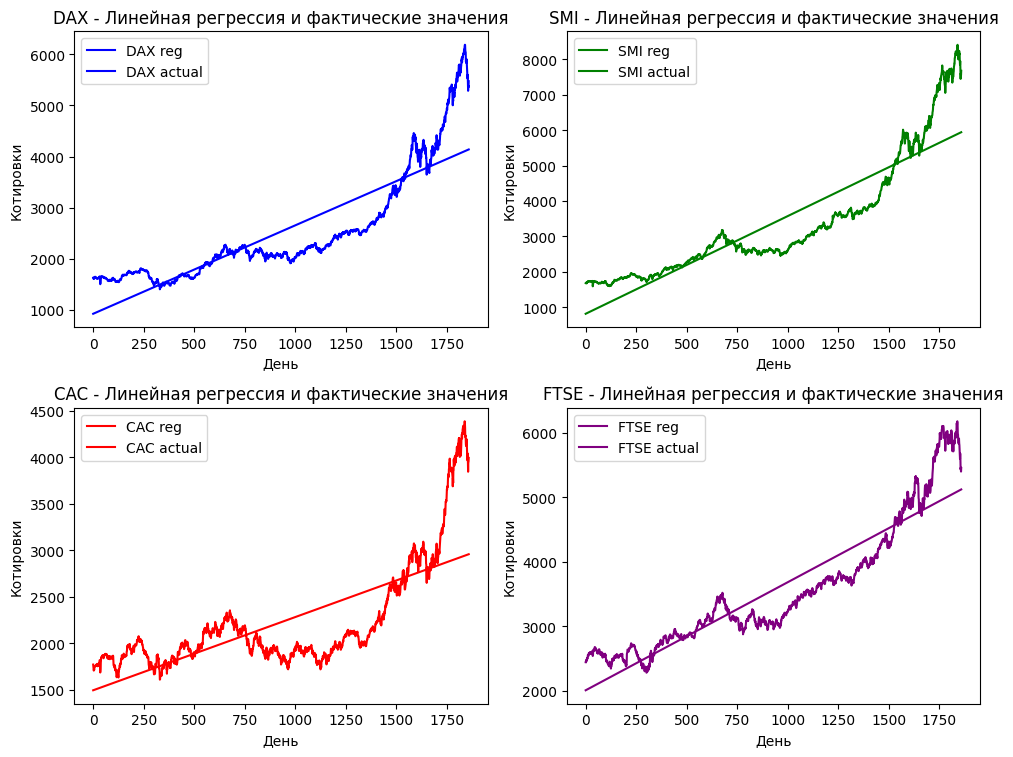

In [346]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
coefs = {}
colors = {'DAX': 'blue', 'SMI': 'green', 'CAC': 'red', 'FTSE': 'purple'}
for i, column in enumerate(['DAX', 'SMI', 'CAC', 'FTSE']):
    row, col = divmod(i, 2)
    
    X = data.index.values.reshape(-1, 1)
    y = data[column]
    
    model = LinearRegression()
    model.fit(X, y)
    coefs[column] = model.coef_[0]
    axes[row, col].plot(data.index, model.predict(X), label=column + " reg", color=colors[column])
    axes[row, col].plot(data.index, data[column], label=column + " actual", color=colors[column])
    axes[row, col].set_title(f'{column} - Линейная регрессия и фактические значения')
    axes[row, col].set_xlabel('День')
    axes[row, col].set_ylabel('Котировки')
    axes[row, col].legend()

#fig.suptitle('Линейная регрессия и фактические значения для каждой биржи', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('birzhi_4_graphs.png')
plt.show()

In [340]:
coefs

{'DAX': 1.7294322637746682,
 'SMI': 2.7597557940917032,
 'CAC': 0.7868296563440051,
 'FTSE': 1.6748314516108036}

# 6.
Загрузите данные JohnsonJohnson из пакета «datasets». Данные содержат поквартальную прибыль компании Johnson & Johnson с 1960 по 1980 гг. Постройте на одном графике все кривые изменения прибыли во времени. Постройте линейную регрессию для каждого квартала в отдельности и для всех кварталов вместе. Оцените, в каком квартале компания имеет наибольшую и наименьшую динамику доходности. Сделайте прогноз по прибыли в 2016 году во всех кварталах и в среднем по году.

In [361]:
data = pd.read_csv('JohnsonJohnson.csv')
data = data.drop("rownames", axis=1)
data.head()

,time,value
0,1960.00,0.71
1,1960.25,0.63
2,1960.50,0.85
3,1960.75,0.44
4,1961.00,0.61


In [362]:
# квартал - 3 месяца или 0.25 года
data['year'] = data['time'].apply(lambda x: int(x))
data['quarter'] = ((data['time'] - data['year']) * 4).apply(lambda x: int(x) + 1)
data.head()

,time,value,year,quarter
0,1960.00,0.71,1960,1
1,1960.25,0.63,1960,2
2,1960.50,0.85,1960,3
3,1960.75,0.44,1960,4
4,1961.00,0.61,1961,1


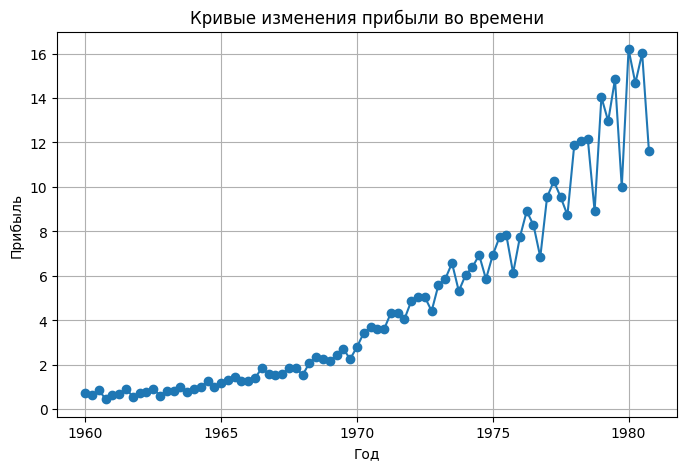

In [363]:
plt.figure(figsize=(8, 5))
plt.plot(data['time'], data['value'], marker='o')
plt.title('Кривые изменения прибыли во времени')
plt.xlabel('Год')
plt.ylabel('Прибыль')
plt.grid(True)
plt.show()

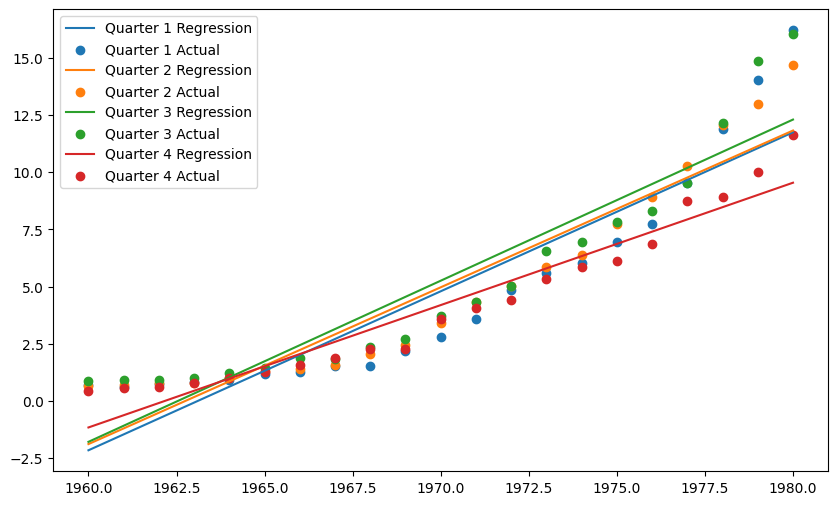

In [391]:
coefs = {}
models = {}
plt.figure(figsize=(10, 6))
for quarter in range(1, 5):
    subset = data[data['quarter'] == quarter]
    #X = np.column_stack((subset['year'].values, subset['year'].values**2))
    X = subset['year'].values.reshape(-1, 1)
    y = subset['value']
    
    model = LinearRegression()
    model.fit(X, y)
    models[quarter] = model
    coefs[quarter] = model.coef_[0]
    plt.plot(subset['year'], model.predict(X), label=f'Quarter {quarter} Regression')
    plt.scatter(subset['year'], subset['value'], label=f'Quarter {quarter} Actual', marker='o')
plt.legend()
plt.savefig('johnson_quarters.png')
plt.show()


In [392]:
coefs

{1: 0.6949610389610388,
 2: 0.6852987012987014,
 3: 0.7043506493506491,
 4: 0.5349090909090908}

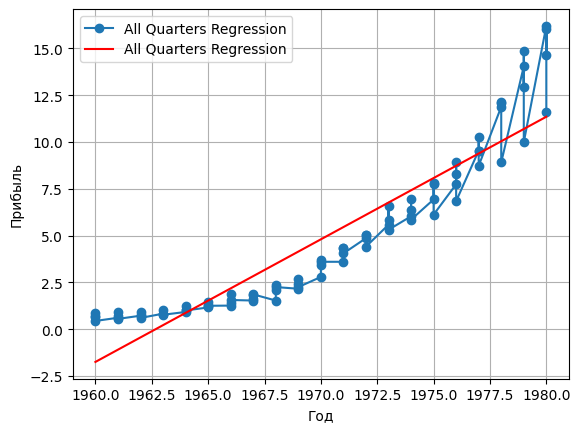

In [393]:
X_all = data['year'].values.reshape(-1, 1)
#X_all = np.column_stack((data['year'].values, data['year'].values**2))
y_all = data['value']

model_all = LinearRegression()
model_all.fit(X_all, y_all)
plt.plot(data['year'], y_all, label='All Quarters Regression', marker='o')
plt.plot(data['year'], model_all.predict(X_all), label='All Quarters Regression', color='red')


#plt.title('Линейная регрессия для каждого квартала и для всех кварталов вместе')
plt.xlabel('Год')
plt.ylabel('Прибыль')
plt.legend()
plt.grid(True)
plt.savefig('johnson_all.png')
plt.show()

In [394]:
for q in range(1, 5):
    model = models[q]
    pred = model.predict([[2016]])
    print(f"Квартал {q}: {pred}")
print(f"Все: {model_all.predict([[2016]])}")

Квартал 1: [36.75963636]
Квартал 2: [36.48945455]
Квартал 3: [37.65393939]
Квартал 4: [28.79391342]
Все: [34.92423593]


# 7.
Загрузите данные sunspot.year из пакета «datasets». Данные содержат количество солнечных пятен с 1700 по 1988 гг. Постройте на графике кривую изменения числа солнечных пятен во времени. Постройте линейную регрессию для данных. 

In [396]:
data = pd.read_csv('sunspot.year.csv')
data = data.drop('rownames', axis=1)
data.head()

,time,value
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


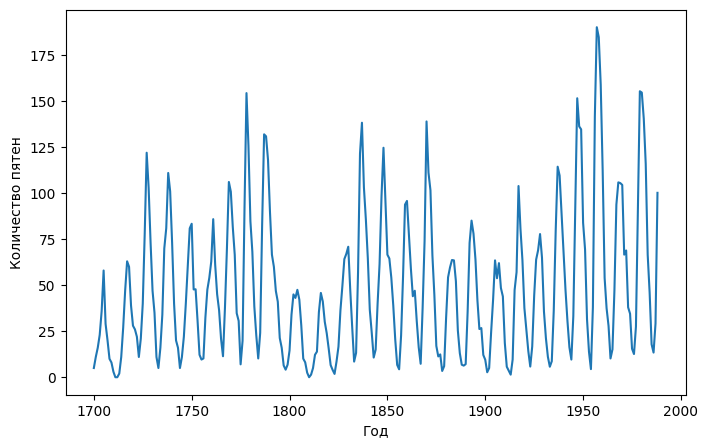

In [397]:
plt.figure(figsize=(8,5))
plt.plot(data['time'], data['value'])
plt.xlabel('Год')
plt.ylabel('Количество пятен')
#plt.savefig("sunspot_year.png")
plt.show()

In [400]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
coefs = {}
colors = {'DAX': 'blue', 'SMI': 'green', 'CAC': 'red', 'FTSE': 'purple'}
for i, column in enumerate(['DAX', 'SMI', 'CAC', 'FTSE']):
    row, col = divmod(i, 2)
    
    X = data.index.values.reshape(-1, 1)
    y = data[column]
    
    model = LinearRegression()
    model.fit(X, y)
    coefs[column] = model.coef_[0]
    axes[row, col].plot(data.index, model.predict(X), label=column + " reg", color=colors[column])
    axes[row, col].plot(data.index, data[column], label=column + " actual", color=colors[column])
    axes[row, col].set_title(f'{column} - Линейная регрессия и фактические значения')
    axes[row, col].set_xlabel('День')
    axes[row, col].set_ylabel('Котировки')
    axes[row, col].legend()

#fig.suptitle('Линейная регрессия и фактические значения для каждой биржи', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('birzhi_4_graphs.png')
plt.show()

0 0
0 1
1 0
1 1


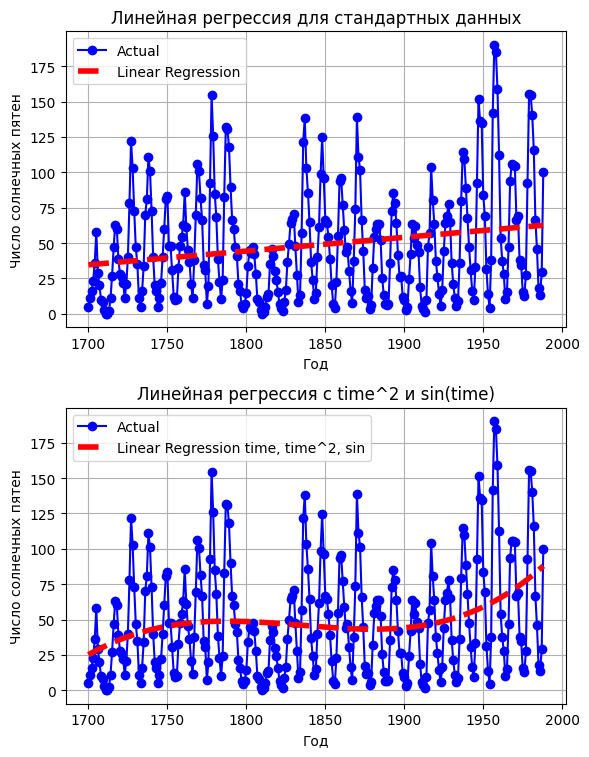

In [419]:
data['sin_time'] = np.sin(2 * np.pi * data['time'] / data['time'].max())
data['time**2'] = data['time']**2

X = data[['time']]
y = data['value']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
X = data[['time', 'sin_time', 'time**2']]
y = data['value']
model_2 = LinearRegression()
model_2.fit(X, y)
y_pred_2 = model_2.predict(X)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

axes[0].plot(data['time'], y, label='Actual', marker='o', linestyle='-', color='b')
axes[0].plot(data['time'], y_pred, label='Linear Regression', linestyle='--', color='r', linewidth=4)
axes[0].set_title('Линейная регрессия для стандартных данных')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Число солнечных пятен')
axes[0].legend()
axes[0].grid(True)
axes[1].plot(data['time'], y, label='Actual', marker='o', linestyle='-', color='b')
axes[1].plot(data['time'], y_pred_2, label='Linear Regression time, time^2, sin', linestyle='--', color='r', linewidth=4)
axes[1].set_title('Линейная регрессия с time^2 и sin(time)')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Число солнечных пятен')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('sunspot_year.png')
plt.show()

# 8.
Загрузите данные из файла пакета «UKgas.scv». Данные содержат объемы ежеквартально потребляемого газа в Великобритании с 1960 по 1986 гг. Постройте линейную регрессию для каждого квартала в отдельности и для всех кварталов вместе. Оцените, в каком квартале потребление газа имеет наибольшую и наименьшую динамику доходности. Сделайте прогноз по потреблению газа в 2016 году во всех кварталах и в среднем по году.

In [427]:
data = pd.read_csv('UKgas.csv')
data = data.drop('rownames', axis=1)
data.head()

,time,value
0,1960.00,160.1
1,1960.25,129.7
2,1960.50,84.8
3,1960.75,120.1
4,1961.00,160.1


In [428]:
data['year'] = data['time'].apply(lambda x: int(x))
data['year**2'] = data['year']**2
data['quarter'] = ((data['time'] - data['year']) * 4).apply(lambda x: int(x) + 1)
data.head()

,time,value,year,year**2,quarter
0,1960.00,160.1,1960,3841600,1
1,1960.25,129.7,1960,3841600,2
2,1960.50,84.8,1960,3841600,3
3,1960.75,120.1,1960,3841600,4
4,1961.00,160.1,1961,3845521,1


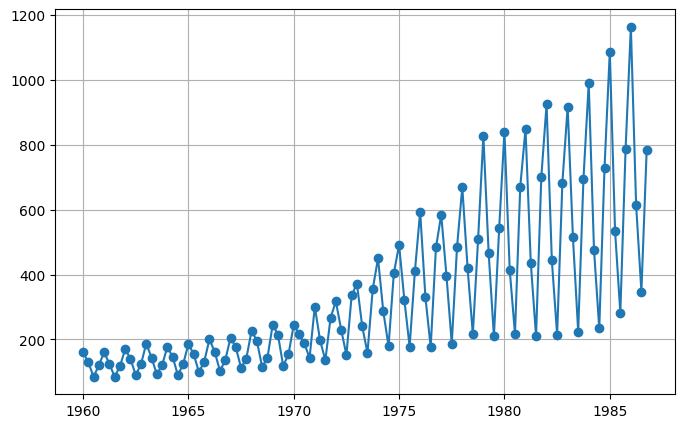

In [429]:
plt.figure(figsize=(8, 5))
plt.plot(data['time'], data['value'], marker='o')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.show()

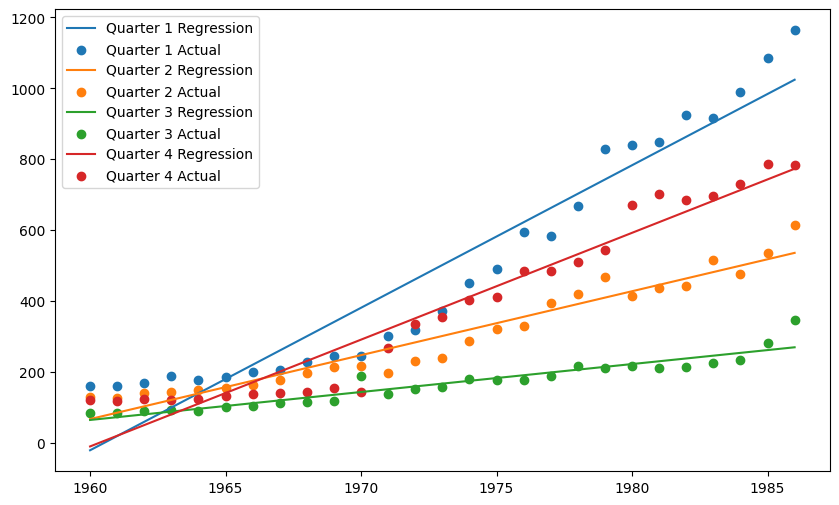

In [445]:
coefs = {}
models = {}
plt.figure(figsize=(10, 6))
for quarter in range(1, 5):
    subset = data[data['quarter'] == quarter]
    
    X = subset['year'].values.reshape(-1, 1)
    y = subset['value']
    
    model = LinearRegression()
    model.fit(X, y)
    models[quarter] = model
    coefs[quarter] = model.coef_[0]
    plt.plot(subset['year'], model.predict(X), label=f'Quarter {quarter} Regression')
    plt.scatter(subset['year'], subset['value'], label=f'Quarter {quarter} Actual', marker='o')
plt.legend()
plt.savefig('gas_quarter_linear.png')
plt.show()


In [446]:
coefs

{1: 40.22081807081807,
 2: 18.0404761904762,
 3: 7.88974358974359,
 4: 30.14261294261295}

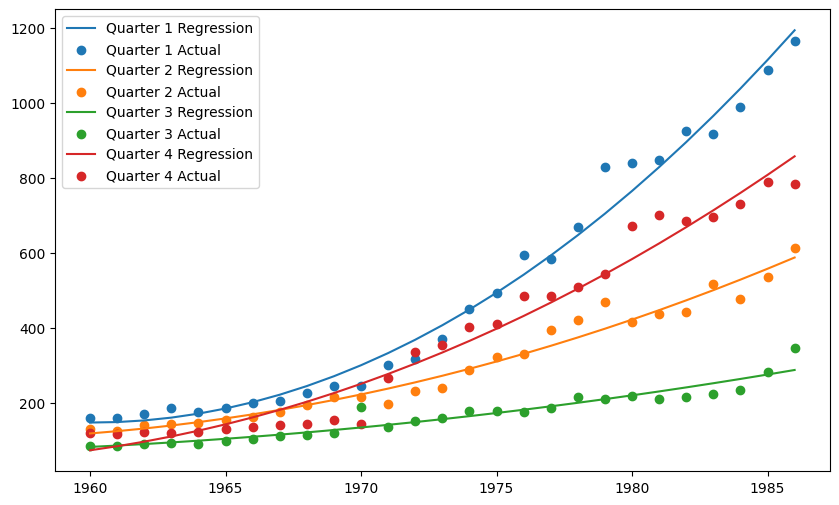

In [442]:
models_2 = {}
plt.figure(figsize=(10, 6))
for quarter in range(1, 5):
    subset = data[data['quarter'] == quarter]
    
    X = subset[['year', 'year**2']]
    y = subset['value']
    
    model = LinearRegression()
    model.fit(X, y)
    models_2[quarter] = model
    plt.plot(subset['year'], model.predict(X), label=f'Quarter {quarter} Regression')
    plt.scatter(subset['year'], subset['value'], label=f'Quarter {quarter} Actual', marker='o')
plt.legend()
plt.savefig('gas_quarter_squared.png')
plt.show()


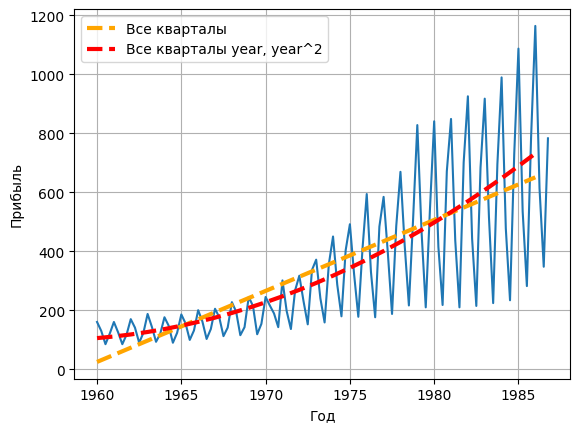

In [444]:
X_all = data[['year']]
y_all = data['value']

model_all = LinearRegression()
model_all.fit(X_all, y_all)
X_all_2 = data[['year', 'year**2']]
model_all_2 = LinearRegression()
model_all_2.fit(X_all_2, y_all)
plt.plot(data['time'], data['value'])
plt.plot(data['year'], model_all.predict(X_all), label='Все кварталы', linestyle='--', color='orange', linewidth=3)
plt.plot(data['year'], model_all_2.predict(X_all_2), label='Все кварталы year, year^2', linestyle='--', color='red', linewidth=3)
#plt.title('Линейная регрессия для каждого квартала и для всех кварталов вместе')
plt.xlabel('Год')
plt.ylabel('Прибыль')
plt.legend()
plt.grid(True)
plt.savefig('gas_all.png')
plt.show()

In [448]:
for q in range(1, 5):
    model = models[q]
    pred = model.predict([[2016]])
    model_2 = models_2[q]
    pred_2 = model_2.predict([[2016, 2016**2]])
    print(f"Квартал {q}: {pred}, квадратное: {pred_2}")

print(f"Все: {model_all.predict([[2016]])}, квадратное: {model_all_2.predict([[2016, 2016**2]])}")

Квартал 1: [2230.93591779], квадратное: [5018.82417582]
Квартал 2: [1076.88492063], квадратное: [1931.0043956]
Квартал 3: [505.93675214], квадратное: [808.2976801]
Квартал 4: [1677.39161579], квадратное: [3065.54969475]
Все: [1372.78730159], квадратное: [2705.91898657]


# 9.
Загрузите данные cars из пакета «datasets». Данные содержат зависимости тормозного пути автомобиля (футы) от его скорости (мили в час). Данные получены в 1920 г. Постройте регрессионную модель и оцените длину тормозного пути при скорости 40 миль в час. 

In [450]:
data = pd.read_csv('cars.csv')
data = data.drop('rownames', axis=1)
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


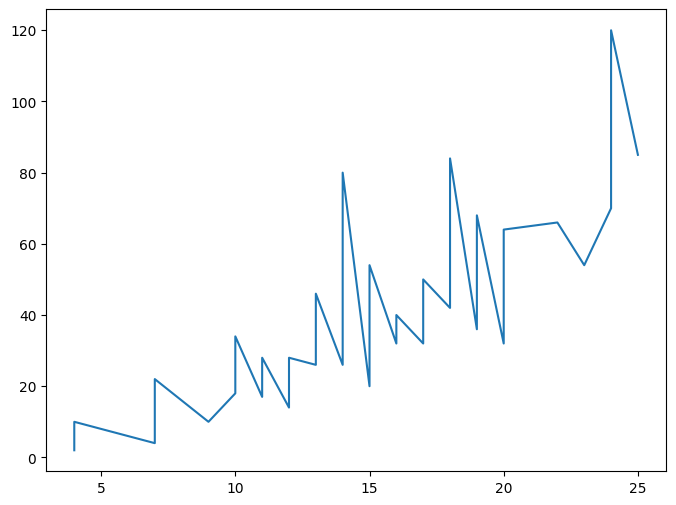

In [451]:
plt.figure(figsize=(8,6))
plt.plot(data['speed'], data['dist'])
plt.show()

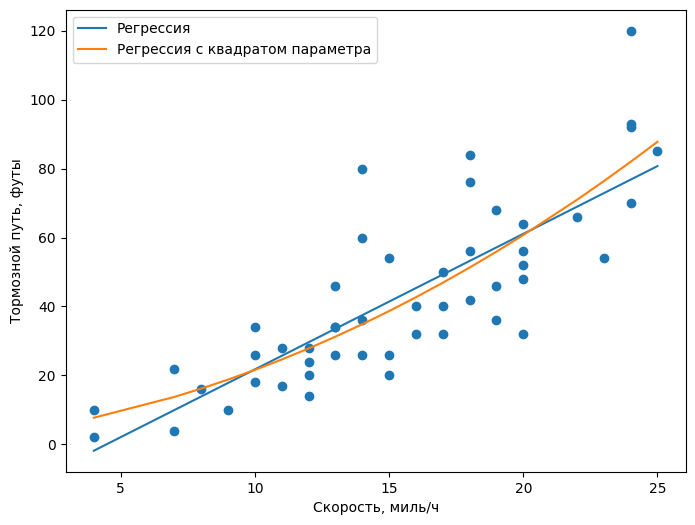

In [457]:
model = LinearRegression()
model.fit(data['speed'].values.reshape(-1, 1), data['dist'])
model_2 = LinearRegression()
data['speed**2'] = data['speed']**2
model_2.fit(data[['speed', 'speed**2']], data['dist'])
plt.figure(figsize=(8,6))
plt.plot(data['speed'], model.predict(data['speed'].values.reshape(-1, 1)), label = 'Регрессия')
plt.plot(data['speed'], model_2.predict(data[['speed', 'speed**2']]), label = 'Регрессия с квадратом параметра')
plt.scatter(data['speed'], data['dist'])
plt.xlabel('Скорость, миль/ч')
plt.ylabel('Тормозной путь, футы')
plt.legend()
plt.savefig('speed_futs.png')
plt.show()

In [458]:
print(model.predict([[40]]))
print(model_2.predict([[40, 40**2]]))

[139.71725547]
[198.93652567]
